In [4]:
#%%
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

import ibl_tools
from ibl_tools import util_files
from ibl_tools.plot import visualize_frames

# select path where data is stored
dirname = '/data/ibl/codecamp'
main_path = Path(dirname)

SES = {
    'A': main_path.joinpath(Path('ZM_1735/2019-08-01/001')),
    'B': main_path.joinpath(Path('ibl_witten_04/2019-08-04/002')), # paws not aligned correctly
    'C': main_path.joinpath(Path('ZM_1736/2019-08-09/004')),
    'D': main_path.joinpath(Path('ibl_witten_04/2018-08-11/001')),
    'E': main_path.joinpath(Path('KS005/2019-08-29/001')),
    'F': main_path.joinpath(Path('KS005/2019-08-30/001')),
}


#%% select a session from the bunch
sid = 'C'
ses_path = Path(SES[sid])

dlc_dict = util_files.load_dlc(ses_path)

#%%
FILENAME_RAW_VIDEO = os.path.join(ses_path, 'raw_video_data/_iblrig_leftCamera.raw.mp4')

#%%
# Load raw video data
clip = VideoFileClip(FILENAME_RAW_VIDEO)

#%%
#  Get list of body parts for right paw:
right_paw_parts = util_files.get_group_bodyparts(dlc_dict)

# Get part attributes as arrays
namer, xr, yr, lr = util_files.get_bodyparts_attributes_as_array(right_paw_parts)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# ranges where markers are outside feasible regions of interest.
trace_outliers = {'A': ([200, 1200],[200, 1200]),
                  'B': ([200, 1200],[200, 1200]),
                  'C': ([ 200, 1200],[200, 1200]),
                 }

([x_min, x_max], [y_min, y_max]) = trace_outliers[sid]
print(x_min, x_max)
print(y_min, y_max)

200 1200
200 1200


2100


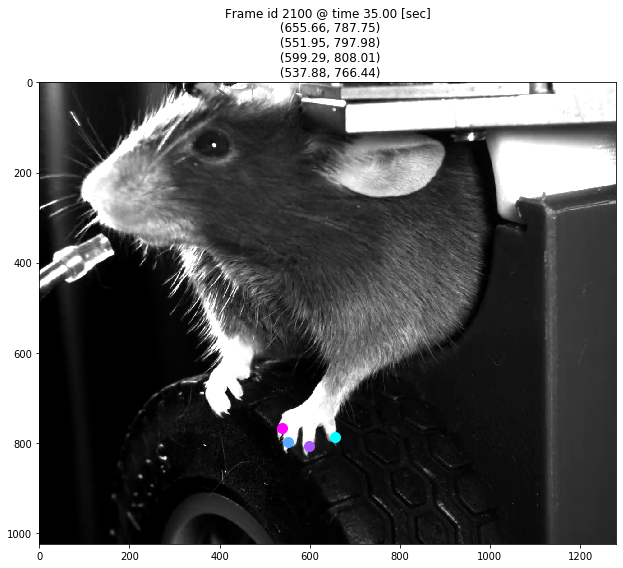

In [6]:
# Visualize frame
visualize_frames(clip, xr, yr,t0=2100)

### Tracking algorithm fails for an extended period of time.
Vertical lines highlights sample segment

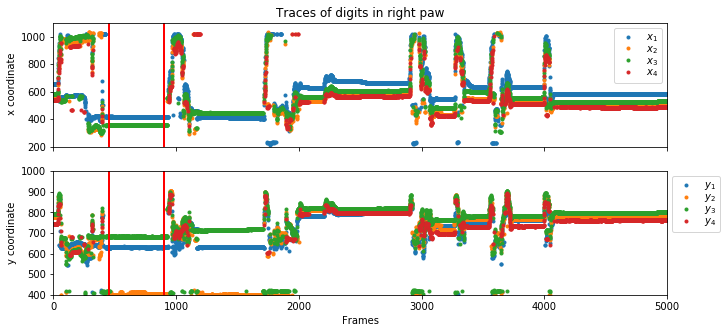

In [10]:
D_obs, _ = xr.shape

t0 = 8500
t = range(t0, t0+5000)
fig, ax = plt.subplots(2, 1, figsize=(11, 5), sharex=True)

ax[0].set_title('Traces of digits in right paw')
for d in range(D_obs):
    ax[0].plot(xr[d, t], '.', label='$ x_{}$'.format(d+1))
    ax[0].set_ylim([200, 1100])
    ax[0].set_xlim([0, len(t)])
    ax[0].legend(bbox_to_anchor=(1, 1), labelspacing=0)
    ax[0].set_ylabel(' x coordinate')
    # plot vertical lines to highligh error region
    ax[0].axvline(450,c='r')
    ax[0].axvline(900,c='r')
    
    
for d in range(D_obs):
    ax[1].plot(yr[d, t], '.', label='$y_{}$'.format(d+1))
    ax[1].set_ylim([400, 1000])
    ax[1].set_xlim([0, len(t)])
    ax[1].legend(bbox_to_anchor=(1, 1), labelspacing=0)
    ax[1].set_ylabel('y coordinate')
    # plot vertical lines to highligh error region
    ax[1].axvline(450,c='r')
    ax[1].axvline(900,c='r')

plt.xlabel('Frames')
plt.show()

8950


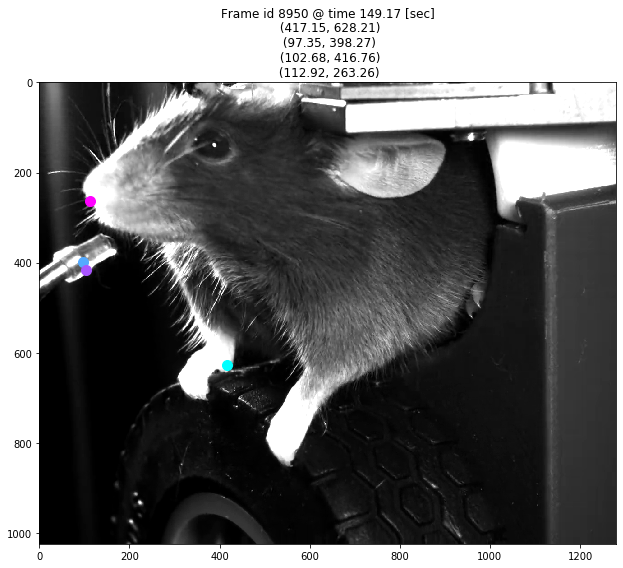

8951


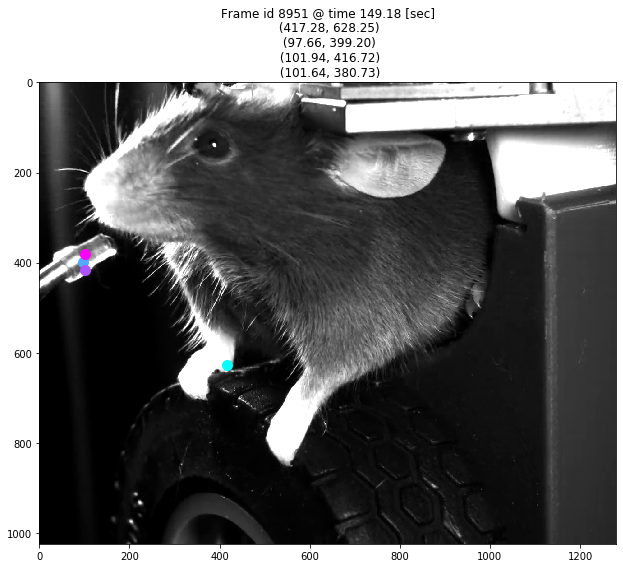

8952


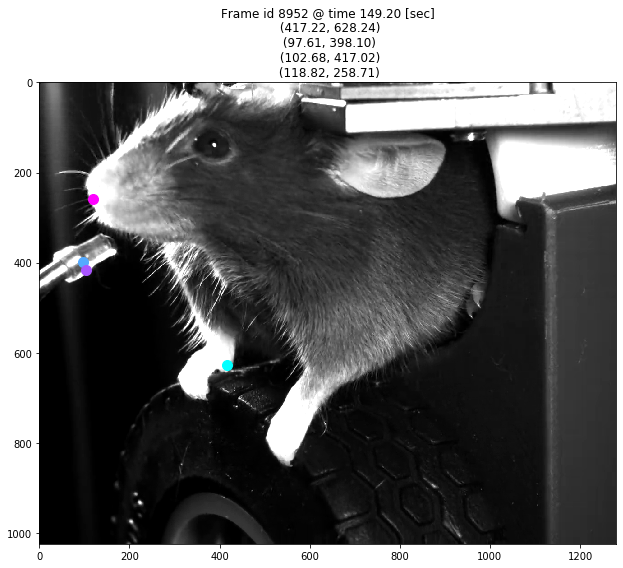

8953


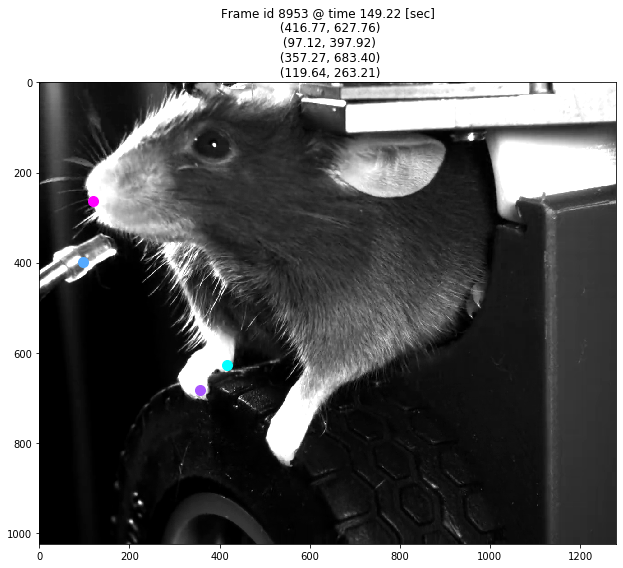

8954


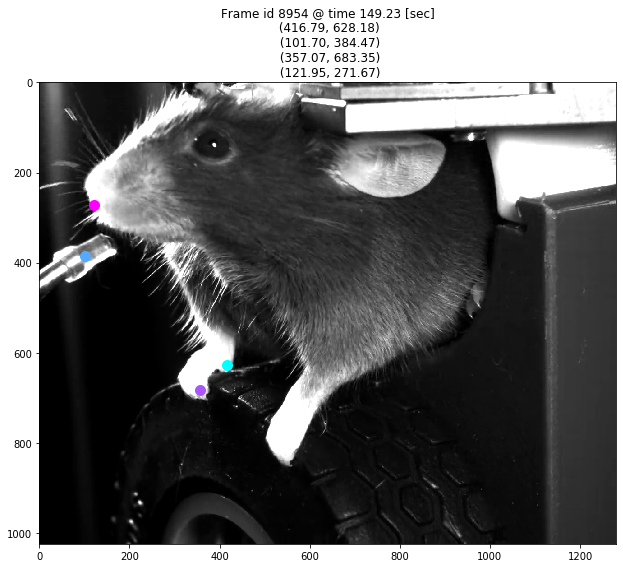

8955


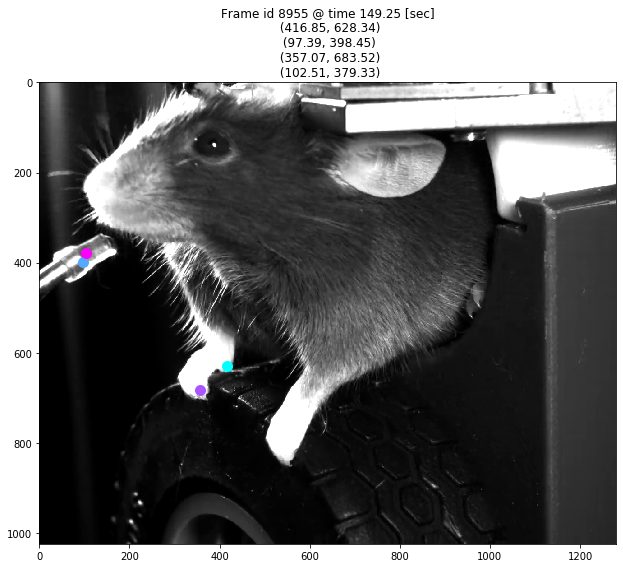

8956


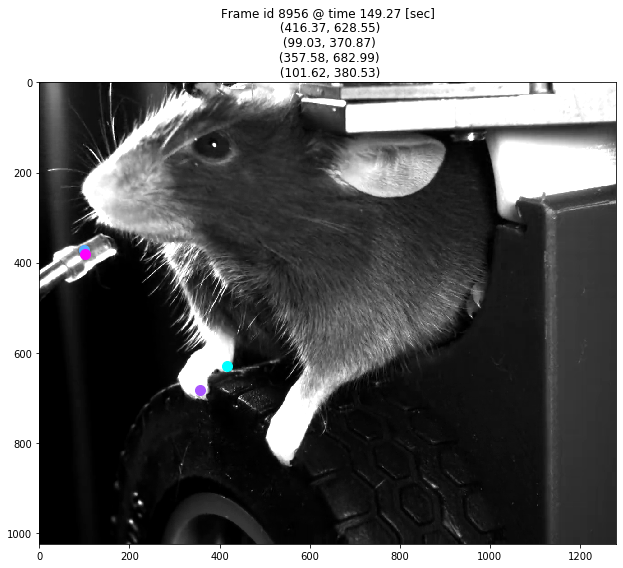

8957


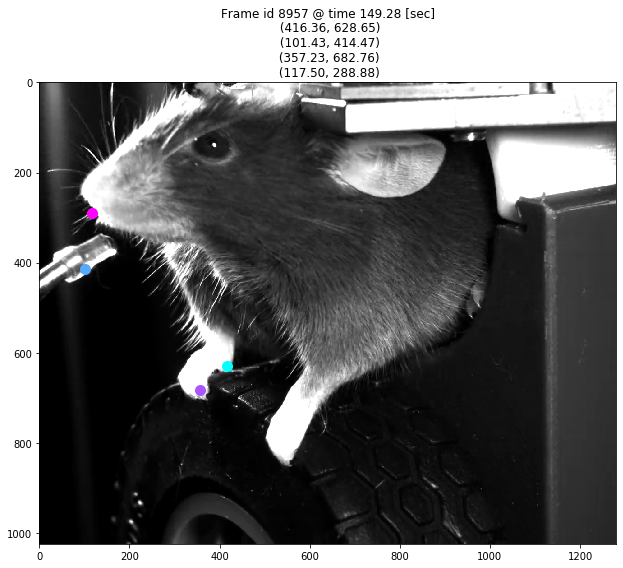

8958


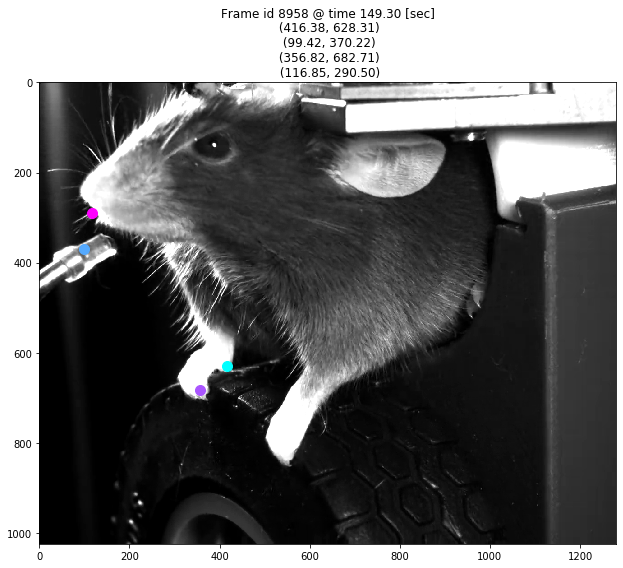

8959


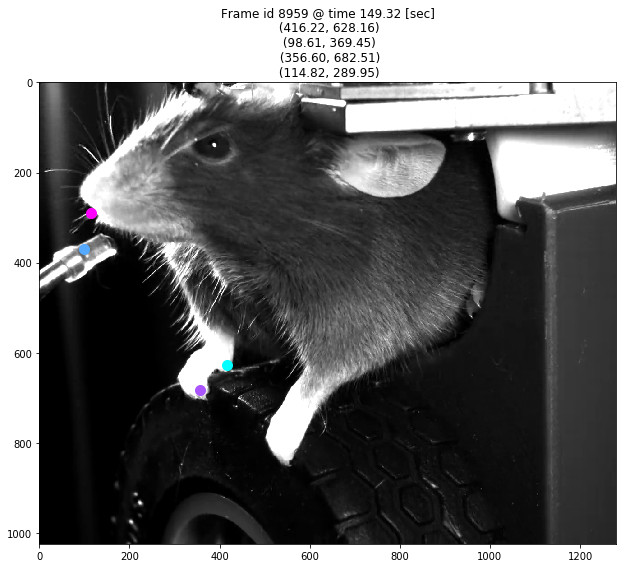

In [8]:
visualize_frames(clip, xr, yr,t0=8500 + 450, t0_len=10)